In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 

In [13]:
## Create a function to show the images.
def show_img(image):
    plt.figure(figsize=(4,3))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# 1.Upload the image(DIP_Lab_task_01.png) extracting details like: image dimension, frequency distribution of intensities, range. [5]

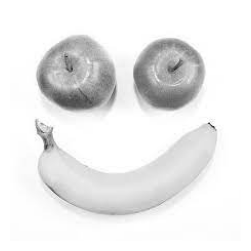

Image Dimensions: Width: 225, Height: 225,Channels: 3


In [14]:
#image dimension
image1= cv2.imread('/kaggle/input/testing-data/lab_data/DIP_Lab_task_01.png')
show_img(image1)
h,w,c=image1.shape
print(f"Image Dimensions: Width: {h}, Height: {w},Channels: {c}")

In [15]:
# finding range
min_value = np.min(image1)
max_value = np.max(image1)
print(f"Pixel Value Range: Min: {min_value}, Max: {max_value}")

Pixel Value Range: Min: 5, Max: 255


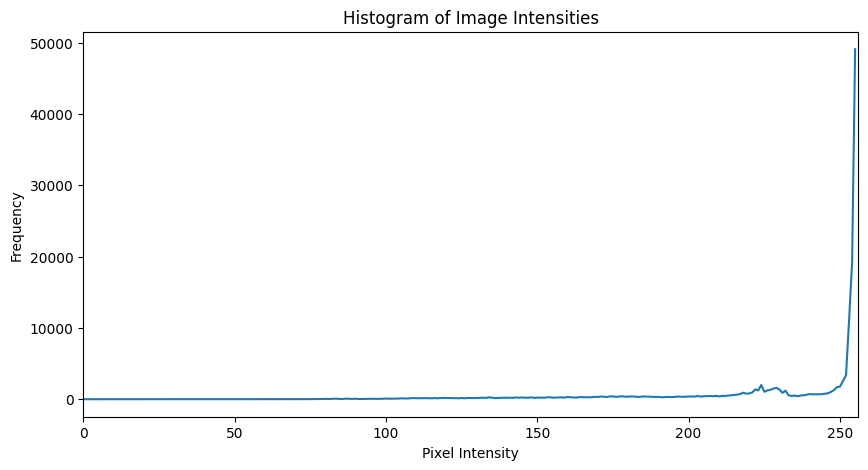

In [16]:
#frequency distribution
hist, bins = np.histogram(image1.flatten(), bins=256, range=[0, 256])

plt.figure(figsize=(10, 5))
plt.title("Histogram of Image Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.plot(hist)

# 2.Convert the RGB image(DIP_Lab_task_02.jpg) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]

#### Gray scale image

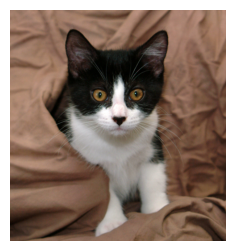

In [17]:
## original image
original_img2=cv2.imread('/kaggle/input/testing-data/lab_data/DIP_Lab_task_02.jpg')
show_img(original_img2)

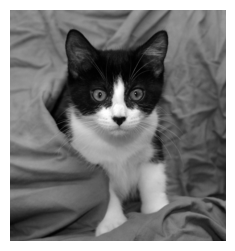

In [18]:
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image2= cv2.imread('/kaggle/input/testing-data/lab_data/DIP_Lab_task_02.jpg',0)
show_img(image2)

Sub-region intensity values:
[[130 130 130 130 132]
 [132 132 132 132 134]
 [133 133 133 133 134]
 [135 136 136 135 137]
 [137 137 137 138 139]]


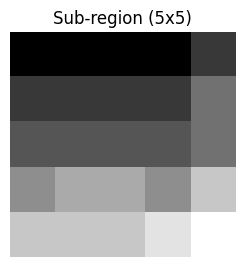

In [19]:
# Define the sub-region coordinates (top-left corner of the region)
sub_region_x = 10 
sub_region_y = 20  
sub_region_size = 5

# Extract the sub-region
sub_region = image2[sub_region_y:sub_region_y + sub_region_size,
                        sub_region_x:sub_region_x + sub_region_size]

# Display the sub-region
print("Sub-region intensity values:")
print(sub_region)


# Display the sub-region
plt.subplot(1, 2, 2)
plt.title("Sub-region (5x5)")
plt.imshow(sub_region, cmap='gray')
plt.axis('off')

plt.show()

# 3.Apply Image(DIP_Lab_task_03.png) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]

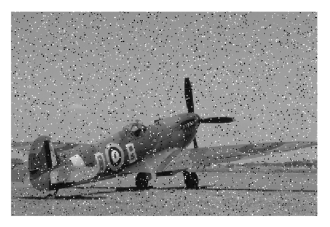

In [20]:
image3= cv2.imread('/kaggle/input/testing-data/lab_data/DIP_Lab_task_03.png')
show_img(image3)

### Create a Gaussian kernel  & smoothed image

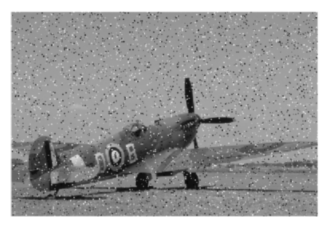

In [21]:
kernel_size = 10
sigma = 1.0  
kernel = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel = np.outer(kernel, kernel)
smoothed_image = cv2.filter2D(image3, -1, gaussian_kernel)

show_img(smoothed_image)

### Averaging Smoothed Image

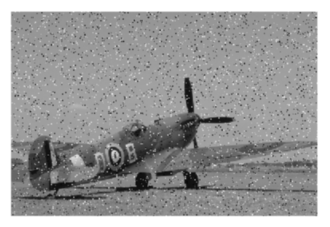

In [22]:
average_kernel = np.ones((3, 3), np.float32) / 9

averaged_image = cv2.filter2D(image3, -1, average_kernel)
show_img(averaged_image)

# 4.Implement an appropriate technique to reduce the brightness of the provided image (DIP_Lab_task_04.jpg) effectively. [20]

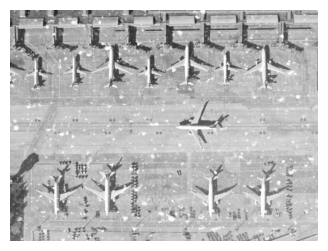

In [23]:
image4 =cv2.imread('//kaggle/input/testing-data/lab_data/DIP_Lab_task_04.jpg',0)
show_img(image4)

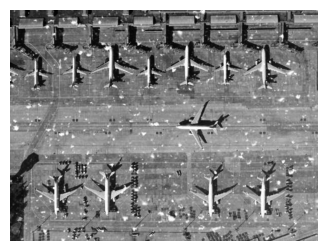

In [24]:
gamma = 2.2
gamma_corrected = np.array(255 * (image4/ 255) ** gamma, dtype='uint8')
show_img(gamma_corrected)

# 5.Solve the segmentation problem for the given image: 'DIP_Lab_task_05.jpg' [30]

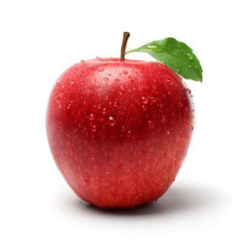

In [25]:
image5=cv2.imread('/kaggle/input/testing-data/lab_data/DIP_Lab_task_05.jpg')
show_img(image5)

### Detecting edge

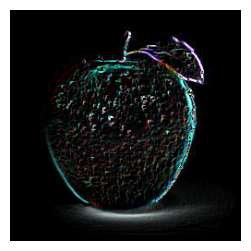

In [26]:
#prewitt
kernelx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(image5, -1, kernelx)
img_prewitty = cv2.filter2D(image5, -1, kernely)
show_img(img_prewittx + img_prewitty)

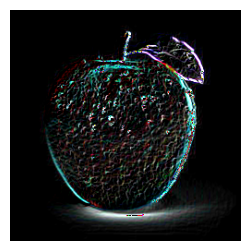

In [27]:
#sobel 
kernelx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
kernely = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img_sobelx= cv2.filter2D(image5, -1, kernelx)
img_sobely= cv2.filter2D(image5, -1, kernely)
show_img(img_sobelx + img_sobely)

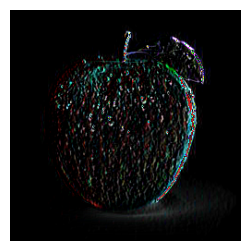

In [28]:
#robert
kernelx=np.array([[-1,0],[0,1]])
kenely=np.array([[0,-1],[1,0]])
img_robertx = cv2.filter2D(image5, -1, kernelx)
img_roberty = cv2.filter2D(image5, -1, kernely)
show_img(img_robertx+img_roberty)